# Evaluating Task Performance

## Introduction

All medical images are created for a purpose, to detect, diagnose, quantify, monitor, etc. For this reason, [OIC](https://aapm.onlinelibrary.wiley.com/doi/full/10.1118/1.4881148) 

**Add bit to recruit results.csv for task performance, maybe add oct2py wrapper for LCD-CT**

In [1]:
!ls /gpfs_projects/brandon.nelson/PediatricCTSizeDataAugmentation/

 ACR464		   bkg_only	 CTP404_peds    old
 anthropomorphic   CCT189_peds	 metadata.csv  'Sibley Hospital Data'


In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sys
sys.path.append('..')

base_dir = Path('/gpfs_projects/brandon.nelson/PediatricCTSizeDataAugmentation/')
meta = pd.read_csv(base_dir / 'metadata.csv')
meta = meta[meta.phantom.isin(['MITA-LCD', 'uniform'])]
meta

,Code #,Name,age [year],gender,weight [kg],height [cm],BMI,weight percentile,ethnicity,effective diameter [cm],Dose [%],recon,phantom,file,simulated,FOV [cm],kernel,scanner
420,NaN,35.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,10,RED-CNN augmented,MITA-LCD,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,39.0,NaN,NaN
421,NaN,35.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,10,RED-CNN,MITA-LCD,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,39.0,NaN,NaN
422,NaN,35.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,10,fbp,MITA-LCD,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,39.0,NaN,NaN
423,NaN,35.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,40,RED-CNN augmented,MITA-LCD,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,39.0,NaN,NaN
424,NaN,35.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,40,RED-CNN,MITA-LCD,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,39.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,NaN,15.1 cm uniform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.1,70,RED-CNN,uniform,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,17.0,NaN,NaN
794,NaN,15.1 cm uniform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.1,70,fbp,uniform,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,17.0,NaN,NaN
795,NaN,15.1 cm uniform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.1,85,RED-CNN augmented,uniform,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,17.0,NaN,NaN
796,NaN,15.1 cm uniform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.1,85,RED-CNN,uniform,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,17.0,NaN,NaN


In [3]:
import SimpleITK as sitk
from utils import get_ground_truth

In [4]:
sorted(meta['effective diameter [cm]'].unique())

[11.2, 13.1, 15.1, 18.5, 20.0, 21.6, 29.2, 35.0]

In [5]:
diam = 20
dose = 100
recon = 'fbp'
sample = meta[(meta['effective diameter [cm]'] == 20) & (meta['Dose [%]'] == dose) & (meta['recon']==recon)]
sample

,Code #,Name,age [year],gender,weight [kg],height [cm],BMI,weight percentile,ethnicity,effective diameter [cm],Dose [%],recon,phantom,file,simulated,FOV [cm],kernel,scanner
575,NaN,20.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,100,fbp,MITA-LCD,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,34.0,NaN,NaN
617,NaN,20.0 cm uniform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,100,fbp,uniform,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,True,34.0,NaN,NaN


In [6]:
 sample[sample.phantom=='uniform'].file.item()

'/gpfs_projects/brandon.nelson/PediatricCTSizeDataAugmentation/CCT189_peds/diameter200mm/signal_absent/dose_100/fbp/signal_absent.mhd'

In [7]:
diam = 20
dose = 100
recon = 'fbp'
sample = meta[(meta['effective diameter [cm]'] == 35) & (meta['Dose [%]'] == dose) & (meta['recon']==recon)]

sa_fname = sample[sample.phantom=='uniform'].file.item()

sa_img = sitk.ReadImage(sa_fname)
sa_vol = sitk.GetArrayFromImage(sa_img)

sa_gt_img = sitk.ReadImage(get_ground_truth(sa_fname))
sa_gt_vol = sitk.GetArrayFromImage(sa_gt_img)

sp_fname = sample[sample.phantom=='MITA-LCD'].file.item()

sp_img = sitk.ReadImage(sp_fname)
sp_vol = sitk.GetArrayFromImage(sp_img)

sp_gt_img = sitk.ReadImage(get_ground_truth(sp_fname))
sp_gt_vol = sitk.GetArrayFromImage(sp_gt_img)

sp_vol.shape, sa_vol.shape

((200, 512, 512), (200, 512, 512))

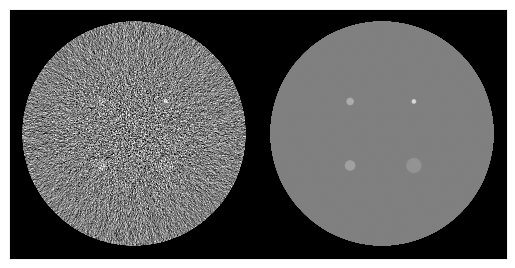

In [8]:
from utils import ctshow
ctshow(np.concatenate([sp_vol[0], sp_gt_vol], axis=1), (40, 0))

In [9]:
from oct2py import octave
import os

def measure_LCD(sp_vol, sa_vol, sp_gt_vol, observers=['LG_CHO_2D']):
    # curdir = os.path.dirname(os.path.realpath(__file__))
    signal_present_array = sp_vol.transpose(1,2,0)
    signal_absent_array = sa_vol.transpose(1,2,0)
    octave.cd('../LCD_CT/src/LCD')
    octave.addpath('classes')
    octave.addpath('functions')
    res = octave.measure_LCD(signal_present_array, signal_absent_array, sp_gt_vol, observers)
    res = {k:v.squeeze() for k,v in res.items()}
    return pd.DataFrame(res)

<Axes: xlabel='insert_HU', ylabel='auc'>

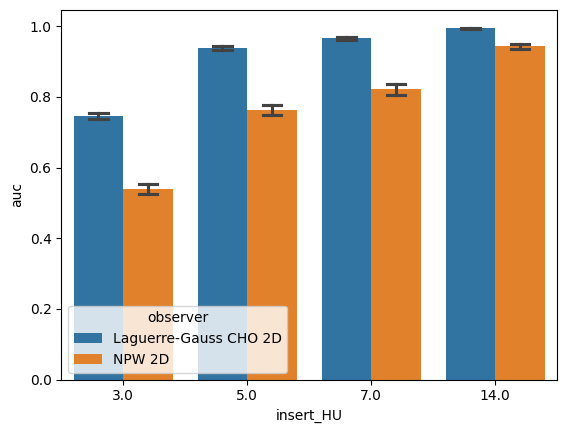

In [10]:
diam = 20
dose = 100
recon = 'fbp'
sample = meta[(meta['effective diameter [cm]'] == 20) & (meta['Dose [%]'] == dose) & (meta['recon']==recon)]

sa_fname = sample[sample.phantom=='uniform'].file.item()

sa_img = sitk.ReadImage(sa_fname)
sa_vol = sitk.GetArrayFromImage(sa_img)

sa_gt_img = sitk.ReadImage(get_ground_truth(sa_fname))
sa_gt_vol = sitk.GetArrayFromImage(sa_gt_img)

sp_fname = sample[sample.phantom=='MITA-LCD'].file.item()

sp_img = sitk.ReadImage(sp_fname)
sp_vol = sitk.GetArrayFromImage(sp_img)

sp_gt_img = sitk.ReadImage(get_ground_truth(sp_fname))
sp_gt_vol = sitk.GetArrayFromImage(sp_gt_img)

sp_vol.shape, sa_vol.shape

res = measure_LCD(sp_vol, sa_vol, sp_gt_vol, observers=['LG_CHO_2D', 'NPWE_2D'])
sns.barplot(data=res, x='insert_HU', y='auc', capsize=0.3, hue='observer')

In [11]:
results_csv = Path('results/lcd_results.csv')

if results_csv.exists():
    results = pd.read_csv(results_csv)
else:
    df_list = []
    for diam in meta['effective diameter [cm]'].unique():
        for dose in meta['Dose [%]'].unique():
            for recon in meta['recon'].unique():
                sample = meta[(meta['effective diameter [cm]']==diam) &
                              (meta['Dose [%]']==dose) &
                              (meta['recon']==recon)]
                if len(sample) != 2: continue

                sa_fname = sample[sample.phantom=='uniform'].file.item()

                sa_img = sitk.ReadImage(sa_fname)
                sa_vol = sitk.GetArrayFromImage(sa_img)

                sa_gt_img = sitk.ReadImage(get_ground_truth(sa_fname))
                sa_gt_vol = sitk.GetArrayFromImage(sa_gt_img)

                sp_fname = sample[sample.phantom=='MITA-LCD'].file.item()

                sp_img = sitk.ReadImage(sp_fname)
                sp_vol = sitk.GetArrayFromImage(sp_img)

                sp_gt_img = sitk.ReadImage(get_ground_truth(sp_fname))
                sp_gt_vol = sitk.GetArrayFromImage(sp_gt_img)

                sample_df = measure_LCD(sp_vol, sa_vol, sp_gt_vol, observers=['LG_CHO_2D', 'NPWE_2D'])
                sample_df['effective diameter [cm]'] = diam
                sample_df['Dose [%]'] = dose
                sample_df['recon'] = recon
                df_list.append(sample_df)
    results = pd.concat(df_list)
    results.to_csv(results_csv, index=False)

In [12]:
results

,observer,insert_HU,snr,auc,reader,effective diameter [cm],Dose [%],recon
0,Laguerre-Gauss CHO 2D,14.0,2.718210,0.9693,1.0,35.0,10,RED-CNN augmented
1,Laguerre-Gauss CHO 2D,14.0,2.906419,0.9751,2.0,35.0,10,RED-CNN augmented
2,Laguerre-Gauss CHO 2D,14.0,2.556301,0.9641,3.0,35.0,10,RED-CNN augmented
3,Laguerre-Gauss CHO 2D,14.0,3.032131,0.9868,4.0,35.0,10,RED-CNN augmented
4,Laguerre-Gauss CHO 2D,14.0,2.578619,0.9662,5.0,35.0,10,RED-CNN augmented
...,...,...,...,...,...,...,...,...
15115,NPW 2D,3.0,0.515464,0.6477,6.0,15.1,85,fbp
15116,NPW 2D,3.0,0.413914,0.6205,7.0,15.1,85,fbp
15117,NPW 2D,3.0,0.537826,0.6412,8.0,15.1,85,fbp
15118,NPW 2D,3.0,0.553680,0.6517,9.0,15.1,85,fbp


In [13]:

import seaborn as sns
import numpy as np
import sys
from utils import calculate_task_improvement

# results = pd.read_csv('results.csv')
# results

In [14]:
# results[results['experiment'] == 'task performance'].shape, results[results['experiment'] == 'noise reduction'].shape

In [15]:
# results['experiment'] = 'noise reduction'
# results.rename({'effective diameter (cm)': 'effective diameter [cm]', 'age (year)' : 'age [year]', 'weight (kg)':'weight [kg]', 'height (cm)': 'height [cm]', 'rmse':'RMSE [HU]', 'noise std':'noise std [HU]'},axis='columns', inplace=True)
# results = pd.concat([results, df])

# results


files = []
for idx, row in results[results.experiment == 'task performance'].iterrows():
    new_file = results[(results['phantom'] == row['phantom']) &
                       (results['effective diameter [cm]'] == row['effective diameter [cm]']) & 
                       (results['Dose [%]'] == row['Dose [%]']) &
                       (results['recon'] == row['recon']) &
                       (results['sim number'] == row['sim number']) &
                       (results['experiment'] == 'noise reduction')].file.item()
    files.append(new_file)
results.loc[results.experiment == 'task performance', 'file'] = files

In [16]:
recon_order = ['fbp', 'RED-CNN', 'RED-CNN augmented']

<Axes: xlabel='effective diameter [cm]', ylabel='auc'>

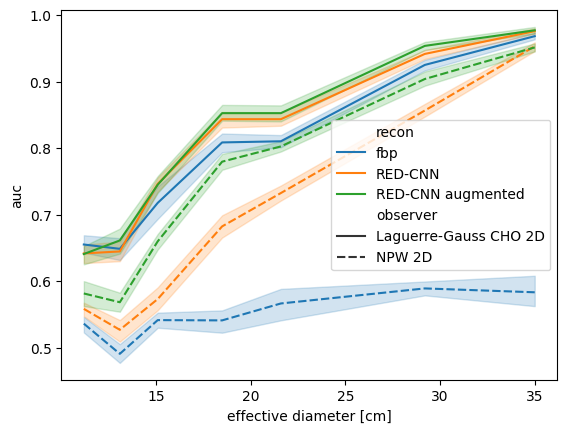

In [17]:
sns.lineplot(data=results[(results['effective diameter [cm]']!=20)&(results['Dose [%]']==25)&
                         (results.insert_HU==3)],
             x='effective diameter [cm]',
             y='auc',
             hue='recon',
             style='observer',
             hue_order=recon_order)

if 'delta auc' not in results:
    results['delta auc'] = calculate_task_improvement(results)['delta auc']

## LG CHO

<Axes: xlabel='effective diameter [cm]', ylabel='auc'>

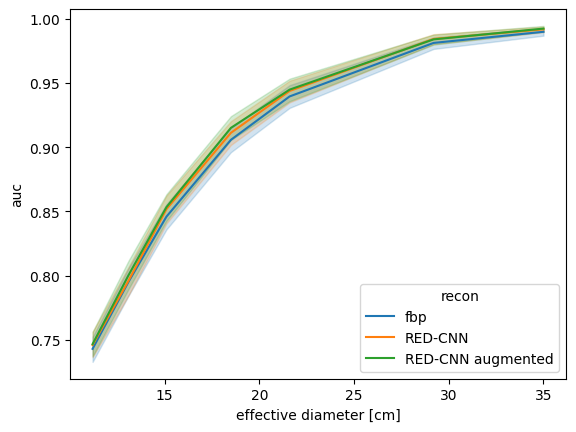

In [18]:
sns.lineplot(data=results[(results['observer']=='Laguerre-Gauss CHO 2D') &
                          (results['effective diameter [cm]']!=20)],
                            x='effective diameter [cm]', y='auc', hue='recon', hue_order=recon_order)

<Axes: xlabel='effective diameter [cm]', ylabel='auc'>

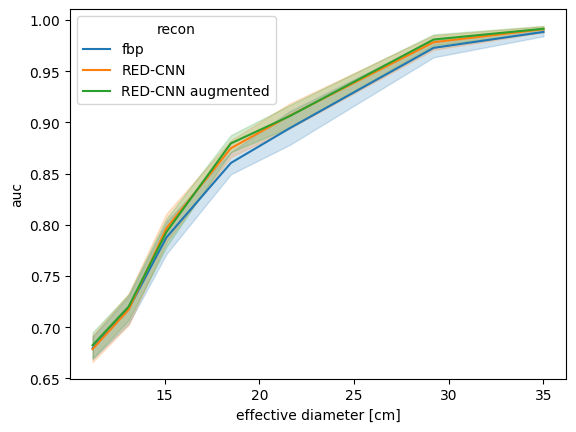

In [19]:
sns.lineplot(data=results[(results['observer']=='Laguerre-Gauss CHO 2D') &
                          (results['effective diameter [cm]']!=20) &
                          (results['Dose [%]']==25)], x='effective diameter [cm]', y='auc', hue='recon', hue_order=recon_order)

In [20]:
results['contrast [HU]'] = results.insert_HU

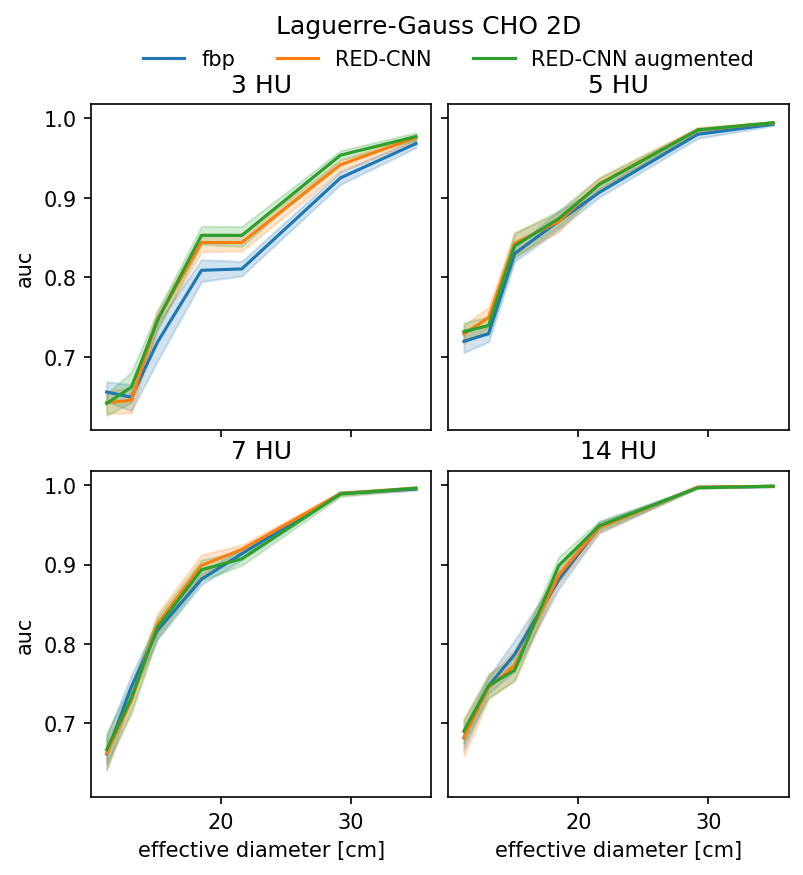

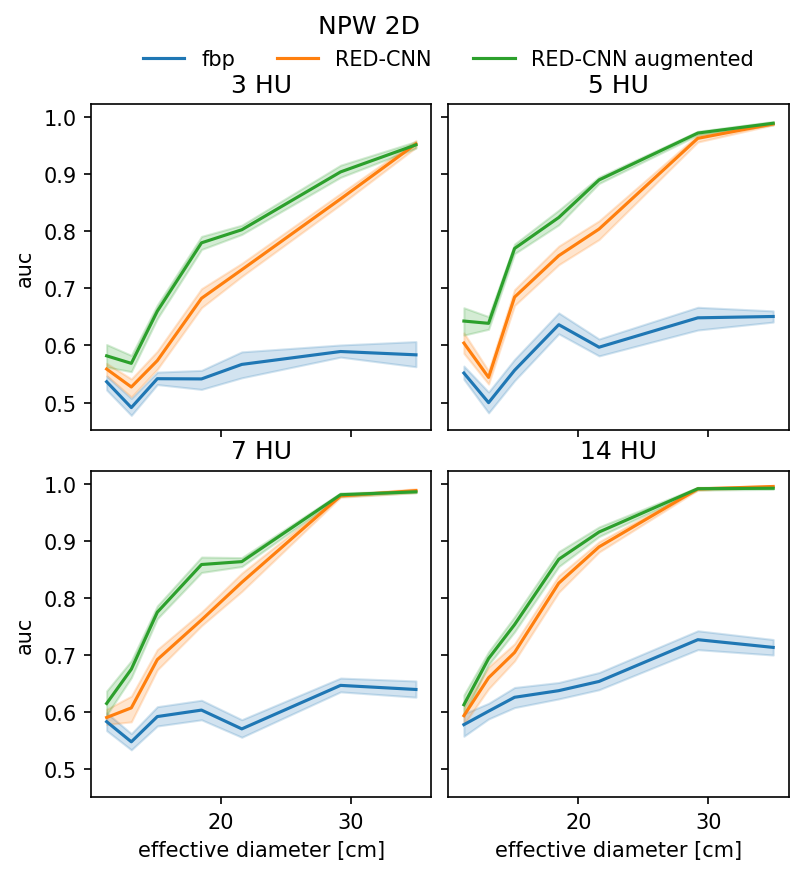

In [21]:
for observer in [o for o in results.observer.unique() if isinstance(o, str)]:
    f, axs = plt.subplots(2,2, dpi=150, figsize=(6,6), sharex=True, sharey=True, gridspec_kw=dict(wspace=0.05, hspace=0.125))
    axs = axs.flatten()
    for idx, hu in enumerate([3, 5, 7, 14]):
        legend = True if idx < 1 else False
        sns.lineplot(data=results[(results['observer']==f'{observer}') &
                                  (results['effective diameter [cm]']!=20) &
                                  (results['Dose [%]']==25) &
                                  (results['contrast [HU]'] == hu)], 
                     x='effective diameter [cm]',
                     y='auc',
                     hue='recon',
                     hue_order=recon_order, ax=axs[idx], legend=legend)
        axs[idx].set_title(f'{hu} HU')
    f.suptitle(f'{observer}')
    sns.move_legend(
        axs[0], "lower center",
        bbox_to_anchor=(1.05, 1.05), ncol=3, frameon=False, title=None,
    )
    # f.savefig(f'{observer}.png', dpi=600)

**Nirmal's comment: add some example images from **

### Figure 8

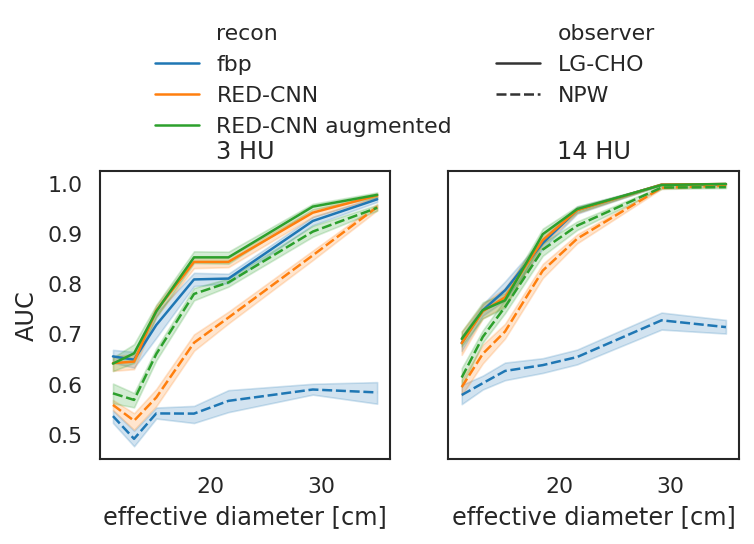

In [22]:
sns.set_context('paper', font_scale=1.2)
sns.set_style('white')
f, axs = plt.subplots(1,2, figsize=(5.5,2.5), dpi=150, sharex=True, sharey=True)
axs = axs.flatten()
for idx, hu in enumerate([3, 14]):
    legend = True if idx < 1 else False
    sns.lineplot(data=results[(results['effective diameter [cm]']!=20) &
                              (results['Dose [%]']==25) &
                              (results['contrast [HU]'] == hu)].replace({'Laguerre-Gauss CHO 2D': 'LG-CHO', 'NPW 2D               ':'NPW'}), 
                 x='effective diameter [cm]',
                 y='auc',
                 hue='recon',
                 hue_order=recon_order, ax=axs[idx], style='observer', legend=legend)
    axs[idx].set_title(f'{hu} HU')
    axs[idx].set_ylabel('AUC')
sns.move_legend(
    axs[0], "lower center",
    bbox_to_anchor=(1.05, 1.05), ncol=2, frameon=False, title=None,
)
f.savefig(f'figures/fig8_task_performance.png', dpi=600, bbox_inches='tight')